# StarGAN-V2 Celeb Face Synthesizer

Paper: [StarGANv2: Diverse Image Synthesis for Multiple Domains](https://arxiv.org/abs/1912.01865)

Video: [https://youtu.be/0EVh5Ki4dIY](https://youtu.be/0EVh5Ki4dIY)

## Setup
Download and Import dependencies

In [1]:
from IPython.display import Image
import os
import json

In [2]:
%%capture
!pip3 install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
!pip3 install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0
!pip install munch
!pip install ffmpeg

Clone the stargan repository and install the required datasets

In [3]:
# %%capture
!git clone https://github.com/Pacolaz/stargan-v2.git
%cd stargan-v2
!bash download.sh celeba-hq-dataset
!bash download.sh pretrained-network-celeba-hq
!bash download.sh wing
%cd ..

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ./data/celeba_hq/train/female/175910.jpg  
  inflating: ./data/celeba_hq/train/female/175935.jpg  
  inflating: ./data/celeba_hq/train/female/175939.jpg  
  inflating: ./data/celeba_hq/train/female/175940.jpg  
  inflating: ./data/celeba_hq/train/female/175949.jpg  
  inflating: ./data/celeba_hq/train/female/175951.jpg  
  inflating: ./data/celeba_hq/train/female/175960.jpg  
  inflating: ./data/celeba_hq/train/female/175986.jpg  
  inflating: ./data/celeba_hq/train/female/175993.jpg  
  inflating: ./data/celeba_hq/train/female/175999.jpg  
  inflating: ./data/celeba_hq/train/female/176029.jpg  
  inflating: ./data/celeba_hq/train/female/176042.jpg  
  inflating: ./data/celeba_hq/train/female/176053.jpg  
  inflating: ./data/celeba_hq/train/female/176060.jpg  
  inflating: ./data/celeba_hq/train/female/176061.jpg  
  inflating: ./data/celeba_hq/train/female/176064.jpg  
  inflating: ./data/celeba_hq/train/female/

## Preprocess Image files

In [4]:
female_celebs = 'stargan-v2/assets/representative/celeba_hq/src/female'
male_celebs = 'stargan-v2/assets/representative/celeba_hq/src/male'

for file in os.listdir(female_celebs):
    os.remove(os.path.join(female_celebs, file))

for file in os.listdir(male_celebs):
    os.remove(os.path.join(male_celebs, file))

In [5]:
%cd stargan-v2
!python main.py --mode align \
               --inp_dir "celebrity-faces/male" \
               --out_dir assets/representative/celeba_hq/src/male
%cd ..

/content/stargan-v2
Namespace(img_size=256, num_domains=2, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1, lambda_sty=1, lambda_ds=1, ds_iter=100000, w_hpf=1, randcrop_prob=0.5, total_iters=100000, resume_iter=0, batch_size=8, val_batch_size=32, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='align', num_workers=4, seed=777, train_img_dir='data/celeba_hq/train', val_img_dir='data/celeba_hq/val', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints', eval_dir='expr/eval', result_dir='expr/results', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='celebrity-faces/male', out_dir='assets/representative/celeba_hq/src/male', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=10, sample_every=5000, save_every=10000, eval_every=50000)
Number of parameters of generator: 43467395
Number of parameters of mapping_netw

In [6]:
%cd stargan-v2
!python main.py --mode align \
               --inp_dir "celebrity-faces/female" \
               --out_dir assets/representative/celeba_hq/src/female
%cd ..

/content/stargan-v2
Namespace(img_size=256, num_domains=2, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1, lambda_sty=1, lambda_ds=1, ds_iter=100000, w_hpf=1, randcrop_prob=0.5, total_iters=100000, resume_iter=0, batch_size=8, val_batch_size=32, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='align', num_workers=4, seed=777, train_img_dir='data/celeba_hq/train', val_img_dir='data/celeba_hq/val', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints', eval_dir='expr/eval', result_dir='expr/results', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='celebrity-faces/female', out_dir='assets/representative/celeba_hq/src/female', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=10, sample_every=5000, save_every=10000, eval_every=50000)
Number of parameters of generator: 43467395
Number of parameters of mapping_

## Synthesize celeb faces


Synthesize output images reflecting diverse styles (e.g., hairstyle) of reference images and save generated images and interpolation videos to the expr/results directory.


In [ ]:
%cd stargan-v2
!python main.py --mode sample --num_domains 2 --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --result_dir expr/results/celeba_hq \
               --src_dir assets/representative/celeba_hq/src \
               --ref_dir assets/representative/celeba_hq/ref
%cd ..

/content/stargan-v2
Namespace(img_size=256, num_domains=2, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1, lambda_sty=1, lambda_ds=1, ds_iter=100000, w_hpf=1.0, randcrop_prob=0.5, total_iters=100000, resume_iter=100000, batch_size=8, val_batch_size=32, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='sample', num_workers=4, seed=777, train_img_dir='data/celeba_hq/train', val_img_dir='data/celeba_hq/val', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints/celeba_hq', eval_dir='expr/eval', result_dir='expr/results/celeba_hq', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='assets/representative/custom/female', out_dir='assets/representative/celeba_hq/src/female', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=10, sample_every=5000, save_every=10000, eval_every=50000)
Number of parameters of generator: 

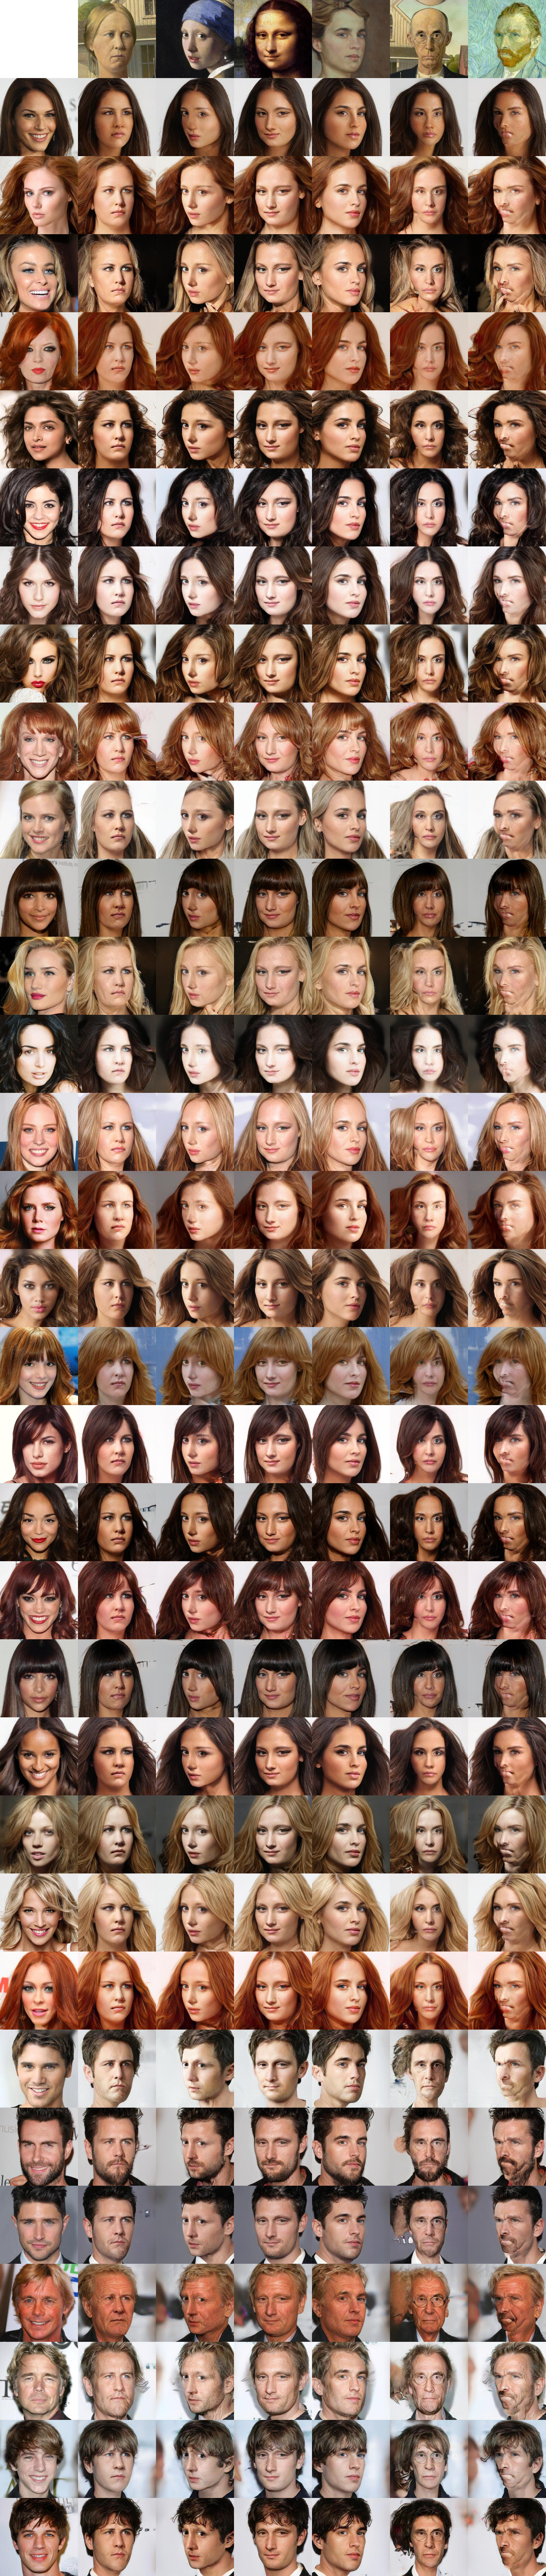

In [ ]:
output_image_file = "stargan-v2/expr/results/celeba_hq/reference.jpg"
Image(output_image_file)

## Evaluate Results

Evaluate StarGAN v2 using Fréchet Inception Distance (FID) and Learned Perceptual Image Patch Similarity (LPIPS)

In [ ]:
%cd stargan-v2
!python main.py --mode eval --num_domains 2 --w_hpf 1 \
               --resume_iter 100000 \
               --train_img_dir data/celeba_hq/train \
               --val_img_dir data/celeba_hq/val \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --eval_dir expr/eval/celeba_hq

%cd ..

/content/stargan-v2
Namespace(img_size=256, num_domains=2, latent_dim=16, hidden_dim=512, style_dim=64, lambda_reg=1, lambda_cyc=1, lambda_sty=1, lambda_ds=1, ds_iter=100000, w_hpf=1.0, randcrop_prob=0.5, total_iters=100000, resume_iter=100000, batch_size=8, val_batch_size=32, lr=0.0001, f_lr=1e-06, beta1=0.0, beta2=0.99, weight_decay=0.0001, num_outs_per_domain=10, mode='eval', num_workers=4, seed=777, train_img_dir='data/celeba_hq/train', val_img_dir='data/celeba_hq/val', sample_dir='expr/samples', checkpoint_dir='expr/checkpoints/celeba_hq', eval_dir='expr/eval/celeba_hq', result_dir='expr/results', src_dir='assets/representative/celeba_hq/src', ref_dir='assets/representative/celeba_hq/ref', inp_dir='assets/representative/custom/female', out_dir='assets/representative/celeba_hq/src/female', wing_path='expr/checkpoints/wing.ckpt', lm_path='expr/checkpoints/celeba_lm_mean.npz', print_every=10, sample_every=5000, save_every=10000, eval_every=50000)
Number of parameters of generator: 43

In [ ]:
EVAL_DIR = "stargan-v2/expr/eval/celeba_hq"
for file in os.listdir(EVAL_DIR):
    if "json" in file:
        with open(os.path.join(EVAL_DIR, file)) as json_file:
            data = json.load(json_file)
            for key, val in data.items():
                print(f"{key}: {val}\n")

LPIPS_latent/male2female: 0.44466675631701946

LPIPS_latent/female2male: 0.45964223332703114

LPIPS_latent/mean: 0.4521544948220253

FID_reference/male2female: 19.91875319966728

FID_reference/female2male: 27.940886331893935

FID_reference/mean: 23.929819765780607

FID_latent/male2female: 9.988664547133222

FID_latent/female2male: 17.41931115916517

FID_latent/mean: 13.703987853149195

LPIPS_reference/male2female: 0.374987481161952

LPIPS_reference/female2male: 0.4008955527096987

LPIPS_reference/mean: 0.38794151693582535

